# Assignment 5

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Runtime→→Restart runtime) and then run all cells (in the menubar, select Runtime→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [ ]:
NAME = "Joyce Seok"
STUDENT_ID = "1580355"

## Question 1: GRU/LSTM

We've seen both LSTM and GRU cells as building blocks for RNNs.

Here is a reminder of each of their corresponding architectures:

![Pic](https://drive.google.com/uc?id=1INZQkDev_8rdFxOT9hfAiPWJRT6-N82S)

### Question 1.i) What are the major differences between each?


**Lstm has 3 gates: input, output, and forget. Gru has two gates reset and update, and does not utilize a memory unit.**



### Question 1.ii) What are the major advantages of each?

 **The gru offers more efficiency because it is less complex.
The lstm is more complex but can remember longer sequences.**

### Question 1.iii) What are the major disadvantages of each?

 **The lstm has more parameters and heavier computation.
The gru cannot handle longer sequences with as much accuracy.**

## Question 2: United States Corona Virus Cases Forecast

### Question 2.i) Import data and get data for United States
We will be using a subset of Corona Virus dataset available at [Kaggle.com](https://www.kaggle.com/). The dataset is rather comprehensive so for our predictions we will use the number of cases in the United States from the 1 January 2020 (when this record starts) to 14 July 2020 (the last time this dataset was updated). The numbers of cases is cumulative. \\

You may want to switch to GPU in "Runtime"->"Change Runtime type" for this assignment.

** Note: The full data set is available at https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=time_series_covid_19_confirmed_US.csv

In [ ]:
# Import and get data
import numpy as np
import pandas as pd
!wget "https://people.ucsc.edu/~mbriden/cse140/time_series_covid_19_confirmed.csv"

--2020-07-27 04:09:28--  https://people.ucsc.edu/~mbriden/cse140/time_series_covid_19_confirmed.csv
Resolving people.ucsc.edu (people.ucsc.edu)... 128.114.119.88
Connecting to people.ucsc.edu (people.ucsc.edu)|128.114.119.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178638 (174K) [text/csv]
Saving to: ‘time_series_covid_19_confirmed.csv.17’

time_series_covid_1 100%[===================>] 174.45K   427KB/s    in 0.4s    

2020-07-27 04:09:30 (427 KB/s) - ‘time_series_covid_19_confirmed.csv.17’ saved [178638/178638]



In [ ]:
# Load data
dataframe = pd.read_csv("time_series_covid_19_confirmed.csv")

Let's look at the data

In [ ]:
dataframe.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,18969,19551,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310,26874,27532,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967,31238,31517,31836,32022,32324,32672,32951,33190,33384,33594,33908,34194,34366,34451,34455,34740
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1212,1232,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672,1722,1788,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402,2466,2535,2580,2662,2752,2819,2893,2964,3038,3106,3188,3278,3371,3454,3571,3667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,9935,10050,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147,11268,11385,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273,13571,13907,14272,14657,15070,15500,15941,16404,16879,17348,17808,18242,18712,19195,19689,20216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,852,852,853,853,853,853,854,854,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,855,858,861
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,86,88,91,92,96,113,118,130,138,140,142,148,155,166,172,176,183,186,189,197,212,212,259,267,276,284,291,315,328,346,346,346,386,386,396,458,462,506,525,541


This data set is somewhat scattered. Some of rows represent an entire country's case data while some country's case data is split up into province. But we want to extract US case data.

In [ ]:
# Extract US corona data and drop province/state - Long.
US_dataframe = dataframe[dataframe['Country/Region'] == 'US']
US_dataframe.head()
US_dataframe = US_dataframe.drop(['Province/State','Country/Region','Lat','Long'], axis=1)

In [ ]:
US_dataframe.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
225,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,15,15,15,16,16,24,30,...,1903904,1926636,1944367,1961781,1979908,2000702,2023652,2048986,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255327,2281766,2312302,2347491,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3364157,3431574


Now we have a case dataframe containing the US case numbers ranging from 22 January 2020 to 14 July 2020. However, lets only consider the data from 2 March 2020 when the total number of Corona virus cases in the US exceeded 50,000.

In [ ]:
# Cut off first 40 days of data
US_dataframe = US_dataframe.iloc[:, 40:]
US_dataframe.shape

(1, 135)

In [ ]:
US_dataframe.head()

,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,...,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20
225,53,73,104,174,222,337,451,519,711,1109,1561,2157,2870,2968,4360,6141,8917,14157,19479,25825,33761,43850,54112,66055,84091,102276,122069,141205,162707,188724,214205,244610,276547,309699,337573,367215,397992,429686,464442,497943,...,1903904,1926636,1944367,1961781,1979908,2000702,2023652,2048986,2074542,2094366,2114026,2137731,2163290,2191099,2222579,2255327,2281766,2312302,2347491,2382426,2422299,2467554,2510259,2549294,2590668,2636414,2687588,2742049,2795361,2841241,2891124,2936077,2996098,3054699,3117946,3184573,3245925,3304942,3364157,3431574


#### Question 2.i.a) Plot the cases for the US 
Using seaborn.lineplot, Plot the cases in the US in a Number of Cases vs. Day plot.
**Hint: you may need np.linspace to create an x-axis. You will also need to cast US_dataframe into an np.array using US_dataframe.values. You will likely need to call reshape ino order to transform the new np.array into shape (135,)

(0.0, 3431574.0)

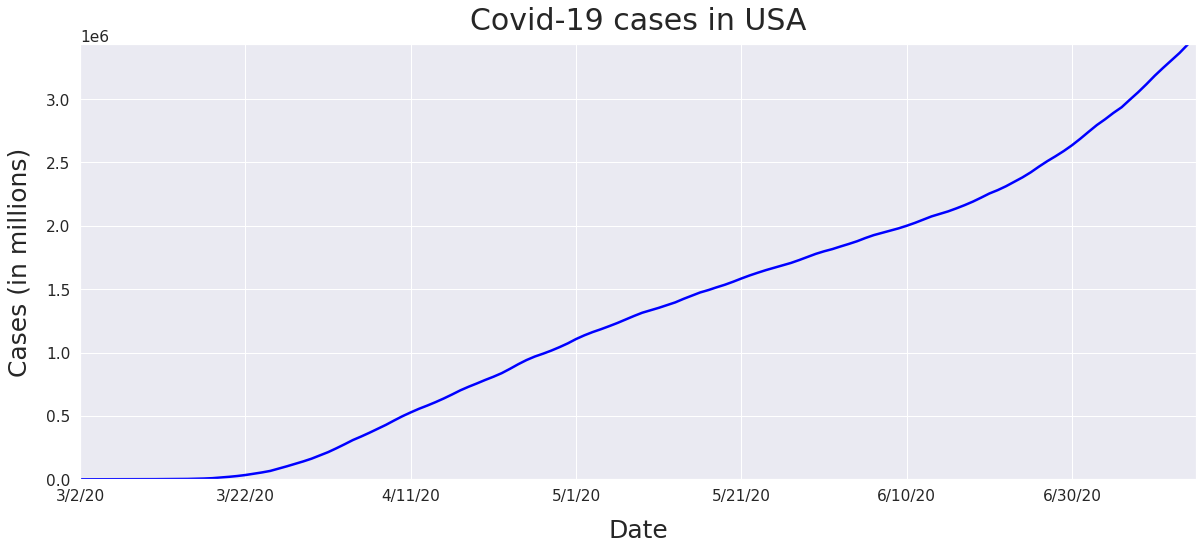

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

dates = np.array(list(US_dataframe.columns.values))
cases = np.array(US_dataframe.values.tolist()[0])
xaxis = np.linspace(0, 4000000, 135)

x_1 = {'Date': dates, 'Cases': cases}
us_df = pd.DataFrame(x_1)

sns.set(font_scale=1.4)
us_df.set_index('Date')['Cases'].plot(figsize=(20, 8), linewidth=2.5, color='blue')
plt.xlabel("Date", labelpad=15, fontsize = 25)
plt.ylabel("Cases (in millions)", labelpad=15, fontsize = 25)
plt.title("Covid-19 cases in USA", y=1.02, fontsize=30);
plt.xlim(0, 135)
plt.ylim(0, 3431574)


#### Question 2.i.b) Analyzing the plot
If you plotted the data correctly, it looks like there are some slight trends in the plot. Recalling that the data starts on 22nd of January, describe some of the trends that you may see. When did cases start to raise dramatically? Did the total number of cases ever seem to stop growing? Add approximate dates.

**Looking at my graph, it looks like there were few cases prior to 3/22/20. Beyond that date, cases began to rise steadily (almost linearly). After 6/30/20, cases started to increase at a greater rate. The number of cases doesn't stop and continue to rise throughout the graph.**


### Question 2.ii) Analyzing the plot
As an aside, disease spread often occur on an exponential scale. Therefore, we will analyze the data in the logarithmic scale. We'll apply the np.log function to the dataframe below then plot the transformed data.

In [ ]:
# Apply natural log to the US_dataframe
df = US_dataframe.apply(np.log)
print(df)

       3/2/20    3/3/20    3/4/20  ...    7/12/20    7/13/20   7/14/20
225  3.970292  4.290459  4.644391  ...  15.010929  15.028688  15.04853

[1 rows x 135 columns]


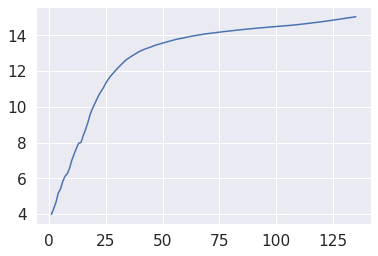

In [ ]:
import seaborn as sns
sns.lineplot(x = np.linspace(1,135,135), y = df.values.reshape(-1))

The plot above shows that on a logarithmic scale, the cumulative number of cases began to level off around days 20-30 but towards day 120 we see that the growth in the number of cases has begun to tick upwards again. Now we will do our time series prediction on the US_dataframe.

#### Question 2.iii.a) Apply MinMaxScaler to US_dataframe
Recall [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from sklearn. Use it to scale the data for our analysis. 
** Hint: You will need to call .transpose inorder to comply with required inputshape (n,1)

In [ ]:
# YOUR CODE HERE

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from dateutil.parser import parse
import dateutil

#Assign X to be the number of consecutive days.
#Each day is unique, so just represent them with
#a sequence of increasing numbers.
X = np.array(list(range(135)))
X.shape = [135,1]
#us_np_arr is an array of covid-19 cases.
cases_np_arr = US_dataframe.to_numpy()
#days_np_arr is an array of day values.
days_np_arr = X
#data_np_arr is the array of cases and days.
data_np_arr = np.hstack((cases_np_arr.T, days_np_arr))
#Split data_np_arr into X and y.
#y holds the last column only, the day values.
y = data_np_arr[:, [1]]
#us_arr is the data X, the number of cases.
us_arr = np.delete(data_np_arr, 1, 1)

#Scale X and y separately, then re-combine 
#X and y afterwards.
scaler = MinMaxScaler(feature_range=(0, 1))
us_arr = scaler.fit_transform(us_arr)
y = scaler.fit_transform(y)
#us_arr is the dataset combining X and y.
us_arr = np.hstack((us_arr, y))

#### Question 2.iii.b) Split data into train and test for time series prediction
We will begin by splitting US_dataframe into train and test data. Begin with split = 0.7.

In [ ]:
# Use this function to create train/test split
def train_test_split(arr: np.array, split = 0.70):
    train_size = int(len(arr) * split)
    test_size = len(arr) - train_size
    US_train, US_test = arr[0:train_size,:], arr[train_size:len(arr),:]
    print("train.shape: ", US_train.shape)
    print("test.shape: ", US_test.shape)
    return (US_train, US_test)

In [ ]:
# Call train_test_split on US_data
train, test = train_test_split(us_arr)

train.shape:  (94, 2)
test.shape:  (41, 2)


Now we create the dataset time_step determines how many days back the model will look to generate a new prediction. Begin with time_step=2

In [ ]:
# Generate a dataset where X[n] contains the readings for the 'time_step' previous days 
# and y contains the reading for today.
def create_dataset(dataset, time_steps=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_steps-1):
		a = dataset[i:(i+time_steps), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_steps, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# Choose the number of time steps that the model "looks back"
time_steps = 2

# Create your training dataset.
X_train, y_train = create_dataset(train, time_steps)
## Create your test dataset.
X_test, y_test = create_dataset(test, time_steps)

#print("X test: ", X_test, "Y test: ", y_test, "X train: ", X_train, "Y train: ", y_train)

In [ ]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#### Question 2.iii.c) LSTM Architecture
Next build the LSTM model. We don't have a lot of data so build the model with:
<ul>
<li>Input Layer shape of size (1,time_steps)</li>
<li>An LSTM Laywer with 10 units</li>
<li>Dense Layer with 1 neuron</li>

Then use 'mean_squared_error' loss with an optimizer. Run model.summary(), compile, then fit the model. Train for 100 epochs using X_train, y_train, validation_split = 0.2


In [ ]:
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error

#Model architecture:

model = Sequential()
model.add(LSTM(10, input_shape=(1, time_steps)))
model.add(Dense(1))

#Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

#Model summary
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_38 (LSTM)               (None, 10)                520       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Fit model
history = model.fit(X_train, y_train, epochs=100, validation_split = 0.2)

Train on 72 samples, validate on 19 samples
Epoch 1/100
72/72 [==============================] - 0s 6ms/step - loss: 0.0360 - val_loss: 0.1824
Epoch 2/100
72/72 [==============================] - 0s 426us/step - loss: 0.0341 - val_loss: 0.1749
Epoch 3/100
72/72 [==============================] - 0s 362us/step - loss: 0.0321 - val_loss: 0.1677
Epoch 4/100
72/72 [==============================] - 0s 483us/step - loss: 0.0303 - val_loss: 0.1605
Epoch 5/100
72/72 [==============================] - 0s 377us/step - loss: 0.0284 - val_loss: 0.1535
Epoch 6/100
72/72 [==============================] - 0s 444us/step - loss: 0.0268 - val_loss: 0.1466
Epoch 7/100
72/72 [==============================] - 0s 385us/step - loss: 0.0252 - val_loss: 0.1399
Epoch 8/100
72/72 [==============================] - 0s 378us/step - loss: 0.0237 - val_loss: 0.1335
Epoch 9/100
72/72 [==============================] - 0s 359us/step - loss: 0.0223 - val_loss: 0.1272
Epoch 10/100
72/72 [=============================

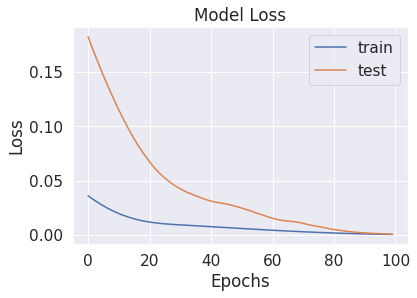

In [ ]:
# Plot the Model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

Lets look at our predictions

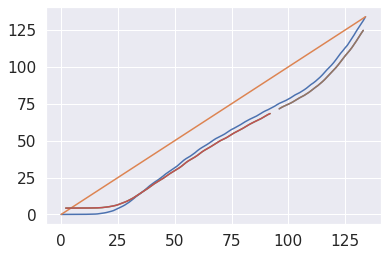

In [ ]:
# Make predictions
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([y_train])

# Shift train predictions for plotting
trainPredictPlot = np.empty_like(us_arr)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_steps:len(trainPredict)+time_steps, :] = trainPredict
# Shift test predictions for plotting
testPredictPlot = np.empty_like(us_arr)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_steps*2)+1:len(us_arr)-1, :] = testPredict
# Plot baseline and predictions
plt.plot(scaler.inverse_transform(us_arr))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

The Blue line is the real number of cases. the Orange line is the train_predicted number of cases, and the green line is the test_predicted number of cases.

#### Question 2.iii.d)
Comment on the fit of your prediction? Are there any interesting correlations between the cumulative case numbers that we plotted above and your forecast?

**The train_predict line (orange) looks okay but not great since it's just a line plot and it seems to be underfitting a bit. However, I think it accurately represents the gradual increase in cases. The train_predict line gives an estimation of a greater number of cases on average.**

#### Question 2.iii.e)
Re-run Question 2.iii.a to 2.iii.c but with split = 0.9. Was your prediction closer to the actual trend? Explain why or why not the prediction was closer to the real trend.

**The orange line stayed the same but the other lines were completely off. By allocating a higher percentage of data for the validation set, not much data would be left for training.**

#### Question 2.iii.f)
This time, try adjusting the parameters time_steps and choose a split to your liking. See if you can get your model to do anything else that is interesting. Explain the changes that you made.

**I tried increasing time_steps to 3,4,5,6 and it seems like even numbers provide a better fit. As I increased the split value, more loss occurred. I think I would stay at 20% for this model.**

## Question 3: Denoising Autoencoder
Now we will build a Denoising auto-encoder to denoise smiley face pictures gathered at the [SMILEsmileD](https://github.com/hromi/SMILEsmileD) archive.
<center><img src="https://people.ucsc.edu/~mbriden/cse140/smiles.png" width="300"></center>

### Question 3.i) Import and display sample images
Let us begin by getting our imports and downloading the dataset.

In [ ]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras import backend as K
%matplotlib inline

In [ ]:
# Download data
url = 'https://github.com/hromi/SMILEsmileD/archive/master.zip'
request.urlretrieve(url, 'data.zip')
zipfile.ZipFile('data.zip').extractall()

In [ ]:
# Open images
x_pos = []
base_path = 'SMILEsmileD-master/SMILEs/'
positive_smiles = base_path + 'positives/positives7/'
negative_smiles = base_path + 'SMILEsmileD-master/SMILEs/negatives/negatives7/'
for img in os.listdir(positive_smiles):
    x_pos.append(mpimg.imread(positive_smiles + img))

# Change into np.array and scale to 255. which is max
x_pos = np.array(x_pos)/255.

# Reshape
x_pos = x_pos.reshape(len(x_pos),64,64,1)

# Shuffle the images in case there was some underlying order
np.random.shuffle(x_pos)

# Split into test and train set, but we will use keras built in validation_size
x_pos_train = x_pos[int(x_pos.shape[0]* .20):]
print("x_pos_train.shape:",x_pos_train.shape)
x_pos_train_noisy = x_pos_train + 0.05 * np.random.normal(loc=0., scale=1., size=x_pos_train.shape)

x_pos_test = x_pos[:int(x_pos.shape[0]* .20)]
print("x_pos_test.shape:",x_pos_test.shape)
x_pos_test_noisy = x_pos_test + 0.05 * np.random.normal(loc=0., scale=1., size=x_pos_test.shape)

x_pos_train.shape: (2952, 64, 64, 1)
x_pos_test.shape: (738, 64, 64, 1)


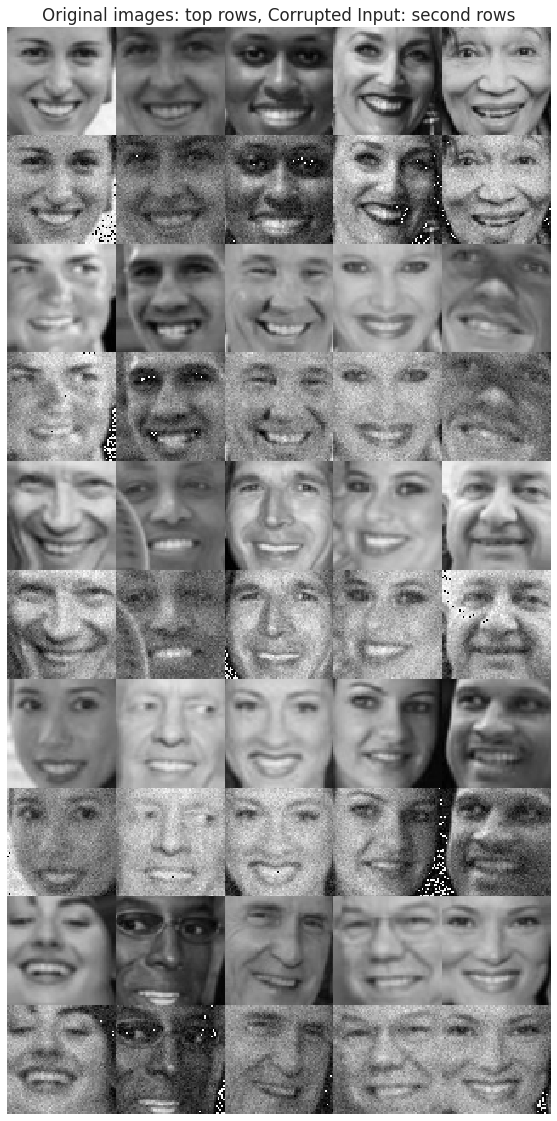

In [ ]:
# Display the 1st 5 original and corrupted
image_size = 64
rows, cols = 5, 5
num = rows * cols
imgs = np.concatenate([x_pos_train[:num], x_pos_train_noisy[:num]])
imgs = imgs.reshape((rows * 2, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 2, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: second rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

### Question 3.ii) Build the Model


#### Question 3.ii.a) Build an Encoder Model
Above are the images before and after being corrupted. Now we will build the autoencoder. Build the Encoder with the following requirements:
<ul>
<li>Input Layer shape of size (64,64,1)</li>
<li>Latent_dimension of 16</li>
<li>Use two CNN layers with two filters per layer of size 32 and 64, and kernel size of 3</li>
<li>1 dense layer of size Latent_dimension</li>
</ul>

Your model should have an input size of (64,64,1) and an output size of (None,16).

** hint: hint: refer to the last class exercise on autocoders.

In [ ]:
# Network parameters.
input_shape = (64, 64, 1)
batch_size = 15
kernel_size = 3 
latent_dim = 16 
layer_filters = [32, 64]

#Encoder architecture.
inputs = Input(shape=input_shape, name='encoder_input')
x = inputs
# Stack of Conv2D blocks
# Note:
# Use Batch Normalization before ReLU on deep networks
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               activation='relu',
               padding='same')(x)
shape = K.int_shape(x)
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)
encoder = Model(inputs, latent, name='encoder')

In [ ]:
# Print model summary

encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
flatten_18 (Flatten)         (None, 16384)             0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                262160    
Total params: 280,976
Trainable params: 280,976
Non-trainable params: 0
_________________________________________________________________


#### 3.ii.b) Build an Dencoder Model
Next we will build the decoder model. This model should have
<ul>
<li>Input Layer shape of size (latent_dimension,)</li>
<li>1 dense layer with the size of 16*16*64</li>
<li>Two transposed convolution layers with two filters per layer of size 32 and 64, and kernel size of 3</li>
<li>1 conv2dTranspose layer with 1 filter and kernel size of 3</li>
<li>1 Output layer with sigmoid activation</li>
</ul>

In [ ]:
# Build the decoder architecture here

latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
#Reshape the data from a vector to a latent space/code layer for transpose convolution.
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

# Stack of Transposed Conv2D blocks

for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        strides=2,
                        activation='relu',
                        padding='same')(x)

#Add only 1 filter so all of the filters will get combined into 1 channel (the image).
x = Conv2DTranspose(filters=1,
                    kernel_size=kernel_size,
                    padding='same')(x)

#Use sigmoid so all of the pixel values are between 0 and 1.
outputs = Activation('sigmoid', name='decoder_output')(x)

# Instantiate Decoder Model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   (None, 16)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 16384)             278528    
_________________________________________________________________
reshape_18 (Reshape)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_transpose_52 (Conv2DT (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_transpose_53 (Conv2DT (None, 64, 64, 32)        18464     
_________________________________________________________________
conv2d_transpose_54 (Conv2DT (None, 64, 64, 1)         289       
_________________________________________________________________
decoder_output (Activation)  (None, 64, 64, 1)         0   

#### Question 3.ii.c) Build Encoder + Dencoder Model
Now combine encoder and decoder models and build the autoencoder architecture.

In [ ]:
# Autoencoder = Encoder + Decoder
# Instantiate Autoencoder Model
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
# Print Model Summary
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   (None, 64, 64, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 16)                280976    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 1)         334209    
Total params: 615,185
Trainable params: 615,185
Non-trainable params: 0
_________________________________________________________________


Call compile using 'mse' loss with an optimizer (adam is probably the safest one to use). Call autocoder.fit with x = x_pos_train_noisy, y = x_pos_train, validation_data = (x_pos_test, x_pos_test_noisy). 

In [ ]:
autoencoder.compile(loss='mse', optimizer='adam')

# Train the autoencoder
autoencoder.fit(x_pos_train_noisy,
                x_pos_train,
                validation_data=(x_pos_test, x_pos_test_noisy),
                epochs=10,
                batch_size=batch_size)

Train on 2952 samples, validate on 738 samples
Epoch 1/10
2952/2952 [==============================] - 2s 686us/step - loss: 0.0170 - val_loss: 0.0126
Epoch 2/10
2952/2952 [==============================] - 2s 582us/step - loss: 0.0087 - val_loss: 0.0103
Epoch 3/10
2952/2952 [==============================] - 2s 574us/step - loss: 0.0074 - val_loss: 0.0098
Epoch 4/10
2952/2952 [==============================] - 2s 583us/step - loss: 0.0070 - val_loss: 0.0095
Epoch 5/10
2952/2952 [==============================] - 2s 579us/step - loss: 0.0067 - val_loss: 0.0094
Epoch 6/10
2952/2952 [==============================] - 2s 570us/step - loss: 0.0065 - val_loss: 0.0093
Epoch 7/10
2952/2952 [==============================] - 2s 572us/step - loss: 0.0063 - val_loss: 0.0094
Epoch 8/10
2952/2952 [==============================] - 2s 586us/step - loss: 0.0062 - val_loss: 0.0091
Epoch 9/10
2952/2952 [==============================] - 2s 579us/step - loss: 0.0060 - val_loss: 0.0092
Epoch 10/10
2952/

### Question 3.iii) Print denoised images (predictions)

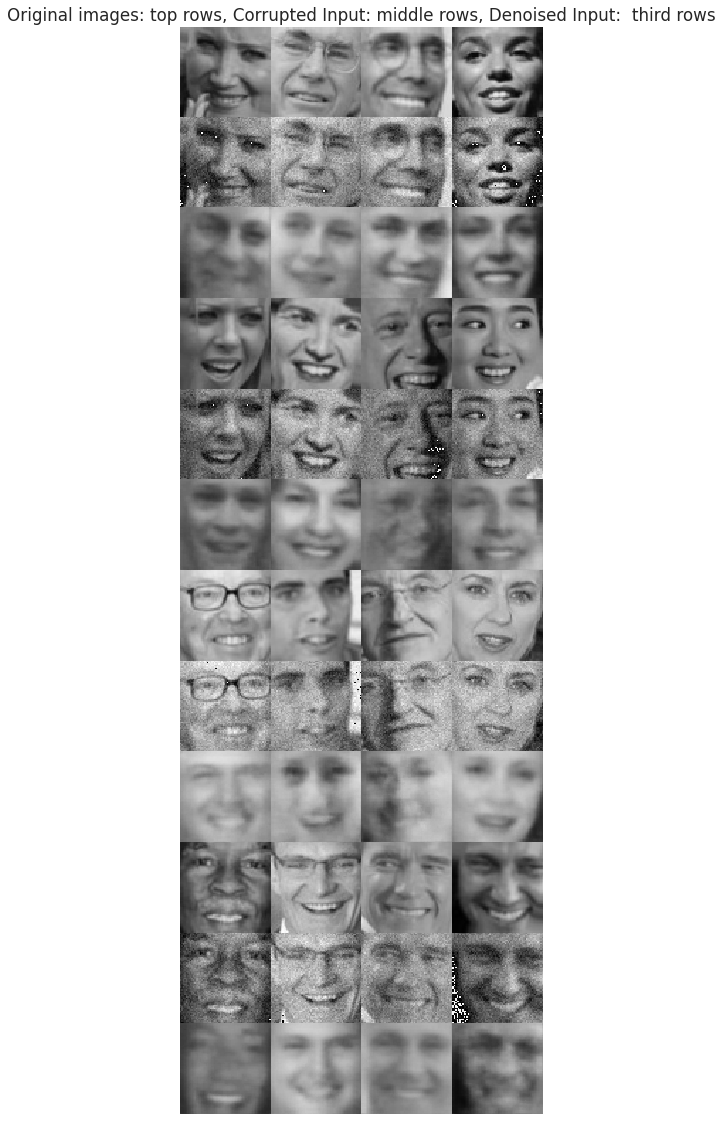

In [ ]:
# Predict the Autoencoder output from corrupted test images
x_decoded = autoencoder.predict(x_pos_test_noisy)
# Display the 1st 4 corrupted and denoised images
rows, cols = 4, 4
num = rows * cols
imgs = np.concatenate([x_pos_test[:num], x_pos_test_noisy[:num], x_decoded[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.title('Original images: top rows, '
          'Corrupted Input: middle rows, '
          'Denoised Input:  third rows')
plt.imshow(imgs, interpolation='none', cmap='gray')
plt.show()

Comment on how your model has performed. Was your model able to denoise the image successfully? Is there anything unexpected results about the images? MSE error is known to smooth an image too much, did your model suffere the same result?

**I think the performance was not great. The noise was removed but I did notice that there is a lot of blurriness/smoothing, which I assume is related to the MSE error mentioned.**